In [4]:
import os

import pandas as pd
import numpy as np
import seaborn as sns
os.listdir()

['.git',
 '.gitignore',
 '.idea',
 '.vscode',
 'BEST_SOLUTION',
 'BEST_SOLUTION_multi_8.txt',
 'cma_v1.py',
 'cma_v2.py',
 'cma_v2_test',
 'demo_controller.py',
 'evoman',
 'farmed_beats_8',
 'final_generalist_assignment.py',
 'final_specialist_assignment.py',
 'FITNESS0',
 'fitness_functions.py',
 'generalist_solution_verification.py',
 'generalist_solution_verification_multi',
 'generalist_solution_verification_multi.py',
 'local_search.ipynb',
 'nn_crossover.py',
 'Pipfile',
 'Pipfile.lock',
 'plot.ipynb',
 'pymoo',
 'pymoo-0.6.0.1.dist-info',
 'pymoo_iterated_learning.py',
 'pymoo_sms_emoa',
 'pymoo_sms_emoa.py',
 'pymoo_sms_emoa_datastore_a6b78960-0d03-498a-9b40-8018923fb053.csv',
 'pymoo_sms_emoa_datastore_bfc46db0-fbd0-47ec-940a-dfa96ab59f29 (1).csv',
 'pymoo_strategy_x.py',
 'random_search_performance_generalist',
 'random_search_performance_generalist.py',
 'README.md',
 'sketches',
 'solutions_beats_5_enemies',
 'solutions_demo',
 'test.py',
 'utils.py',
 '__pycache__']

In [56]:
solutions = pd.DataFrame()
for s in os.listdir('data'):
    df = pd.read_csv(f'data/{s}')
    solutions = pd.concat([solutions, df])
    
solutions = solutions.reset_index(drop=True)
solutions

,n_gens,n_evals,ind_id,f1,f2,f3,f4,f5,f6,f7,f8,obj_hard,obj_medium,obj_easy
0,1,10,0,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010
1,1,10,1,0.000010,0.000010,0.000010,0.000010,3.985292,0.000010,0.000010,0.000010,0.000010,0.000010,0.000015
2,1,10,2,0.000010,0.000010,0.000010,0.000010,4.248510,0.000010,0.000010,0.000010,0.000010,0.000010,0.000015
3,1,10,3,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010
4,1,10,4,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,10,100,5,23.092245,104.406731,13.092245,13.092245,104.158899,33.092245,83.092245,101.648851,27.202319,18.204214,103.389693
396,10,100,6,53.092245,23.092245,73.092245,13.092245,104.449697,3.092245,0.000010,33.092245,5.844112,0.000030,36.102330
397,10,100,7,53.092245,23.092245,63.092245,13.092245,104.406731,13.092245,0.000010,33.092245,21.004821,0.000030,36.100619
398,10,100,8,53.092245,23.092245,63.092245,13.092245,104.406731,23.092245,0.000010,33.092245,32.185531,0.000030,36.100619


In [58]:
f = [f'f{i}' for i in range(1, 9)]
agg = solutions[f].aggregate(['mean'], axis=1)

agg_mean = solutions[['n_gens', 'n_evals', 'ind_id']].join(agg)[['n_evals', 'mean']]
agg_max = agg_mean.groupby('n_evals').max().rename(columns={'mean': 'max'})

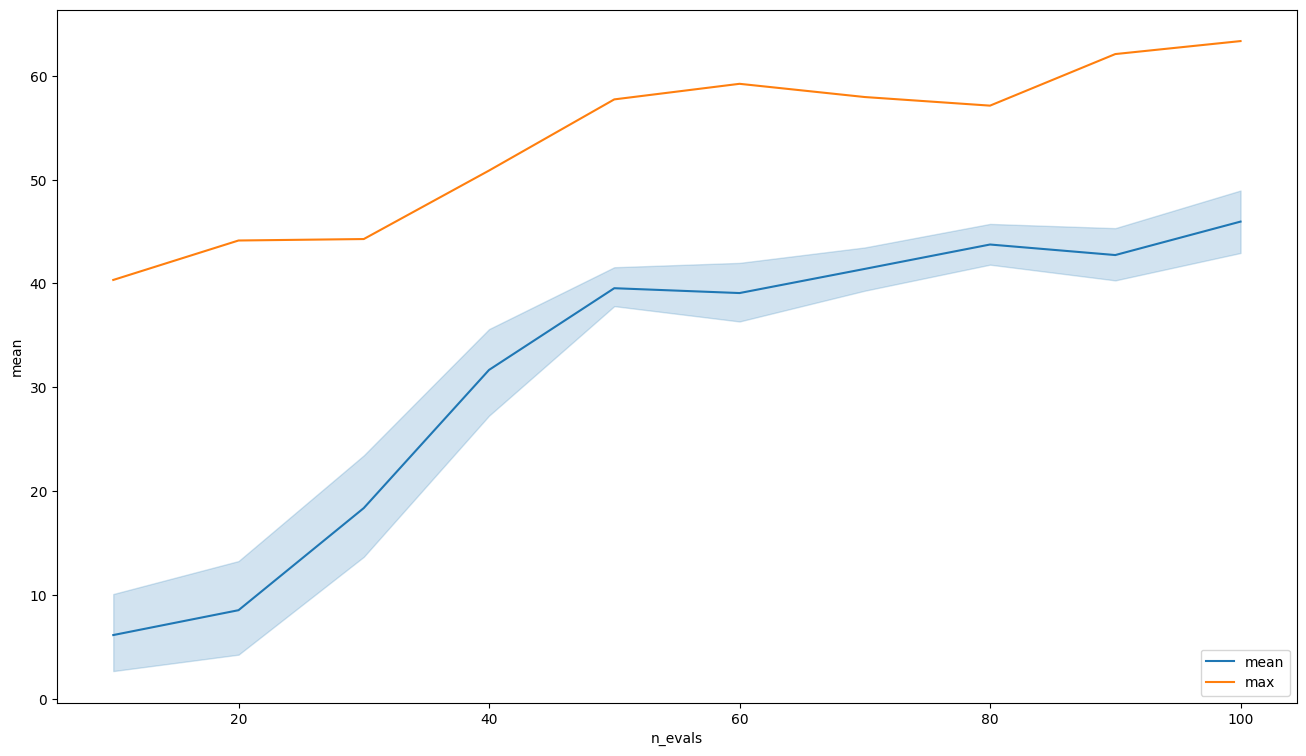

In [59]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16, 9))

# Plot mean and std
sns.lineplot(data=agg_mean, x='n_evals', y='mean', 
             ax=ax, label='mean')

# Plot max
sns.lineplot(data=agg_max, x='n_evals', y='max', 
             ax=ax, label='max')

# Plot legend
ax.legend(loc=4)

# Show
plt.show();